In [307]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

## **Análisis exploratorio de datos (EDA)**

In [308]:
# Leer todas las hojas del Excel
archivo_excel = "trx_recaudacion_km_empresa_54_2020_2025.xlsx"
hojas = pd.read_excel(archivo_excel, sheet_name=None)

# Lista para guardar los DataFrames transformados
df_lista = []

for nombre_hoja, df in hojas.items():
    df['LINEA'] = nombre_hoja.strip()  # agregar nombre de hoja como línea
    df_lista.append(df)
    print(f"Línea: {nombre_hoja}")
    display(df.info())

Línea: 166
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1988 non-null   float64       
 2   RECAUDACION  1988 non-null   float64       
 3   KM           1988 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 77.8+ KB


None

Línea: 236
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1988 non-null   float64       
 2   RECAUDACION  1988 non-null   float64       
 3   KM           1988 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 77.8+ KB


None

Línea: 269
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1986 non-null   float64       
 2   RECAUDACION  1986 non-null   float64       
 3   KM           1987 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 77.8+ KB


None

Línea: 395
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1986 non-null   float64       
 2   RECAUDACION  1986 non-null   float64       
 3   KM           1986 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 77.8+ KB


None

Línea: 441
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1986 non-null   float64       
 2   RECAUDACION  1986 non-null   float64       
 3   KM           1986 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 77.8+ KB


None

Línea: 443
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1985 non-null   float64       
 2   RECAUDACION  1985 non-null   float64       
 3   KM           1985 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 77.8+ KB


None

Línea: 504
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1987 non-null   float64       
 2   RECAUDACION  1987 non-null   float64       
 3   KM           1988 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 77.8+ KB


None

Línea: 634
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1985 non-null   float64       
 2   RECAUDACION  1985 non-null   float64       
 3   KM           1987 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 77.8+ KB


None

Línea: 504I
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1889 non-null   float64       
 2   RECAUDACION  1889 non-null   float64       
 3   KM           1899 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 77.8+ KB


None

In [ ]:
# Completamos valores nulos en CANT. TRX, RECAUDACION y KM
for df_linea in df_lista:
    df['FECHA'] = pd.to_datetime(df['FECHA'])
    df_linea['CANT. TRX'] = df_linea['CANT. TRX'].ffill()
    df_linea['RECAUDACION'] = df_linea['RECAUDACION'].ffill()
    df_linea['KM'] = df_linea['KM'].ffill()

In [310]:
# Unir todos los DataFrames
df_final = pd.concat(df_lista, ignore_index=True)

# Reordenar columnas
columnas = ['FECHA', 'LINEA', 'CANT. TRX', 'RECAUDACION', 'KM']
df_final = df_final[columnas]

In [311]:
df_final

,FECHA,LINEA,CANT. TRX,RECAUDACION,KM
0,2020-01-01,166,9121.0,142707.83,8350.738
1,2020-01-02,166,34135.0,493514.22,15555.049
2,2020-01-03,166,37207.0,535227.08,15866.048
3,2020-01-04,166,31732.0,470262.62,16829.046
4,2020-01-05,166,22091.0,329308.39,12240.411
...,...,...,...,...,...
17896,2025-06-07,504I,336.0,127582.38,650.192
17897,2025-06-08,504I,204.0,75651.72,668.249
17898,2025-06-09,504I,967.0,320191.52,946.772
17899,2025-06-10,504I,926.0,289751.48,927.829


In [312]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17901 entries, 0 to 17900
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        17901 non-null  datetime64[ns]
 1   LINEA        17901 non-null  object        
 2   CANT. TRX    17901 non-null  float64       
 3   RECAUDACION  17901 non-null  float64       
 4   KM           17901 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 699.4+ KB


In [ ]:
df = df_final  # evita SettingWithCopyWarning

df['nombre_dia'] = df['FECHA'].dt.day_name()

#aseguro el orden correcto de los días de la semana
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['nombre_dia'] = pd.Categorical(df['nombre_dia'], categories=dias_ordenados, ordered=True)

df['nombre_mes'] = df['FECHA'].dt.month_name()

# Para asegurar el orden correcto
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
df['nombre_mes'] = pd.Categorical(df['nombre_mes'], categories=meses_ordenados, ordered=True)


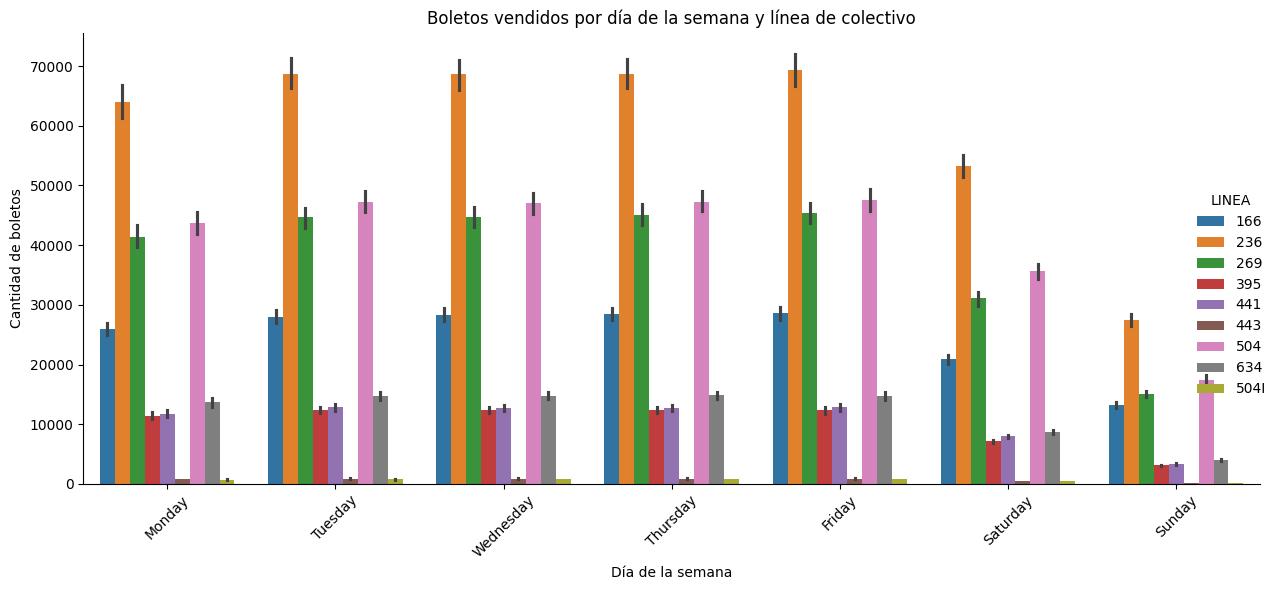

In [314]:
sns.catplot(
    data=df,
    kind="bar",
    x="nombre_dia",
    y='CANT. TRX',
    hue="LINEA",
    height=6,
    aspect=2
)

plt.title("Boletos vendidos por día de la semana y línea de colectivo")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de boletos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

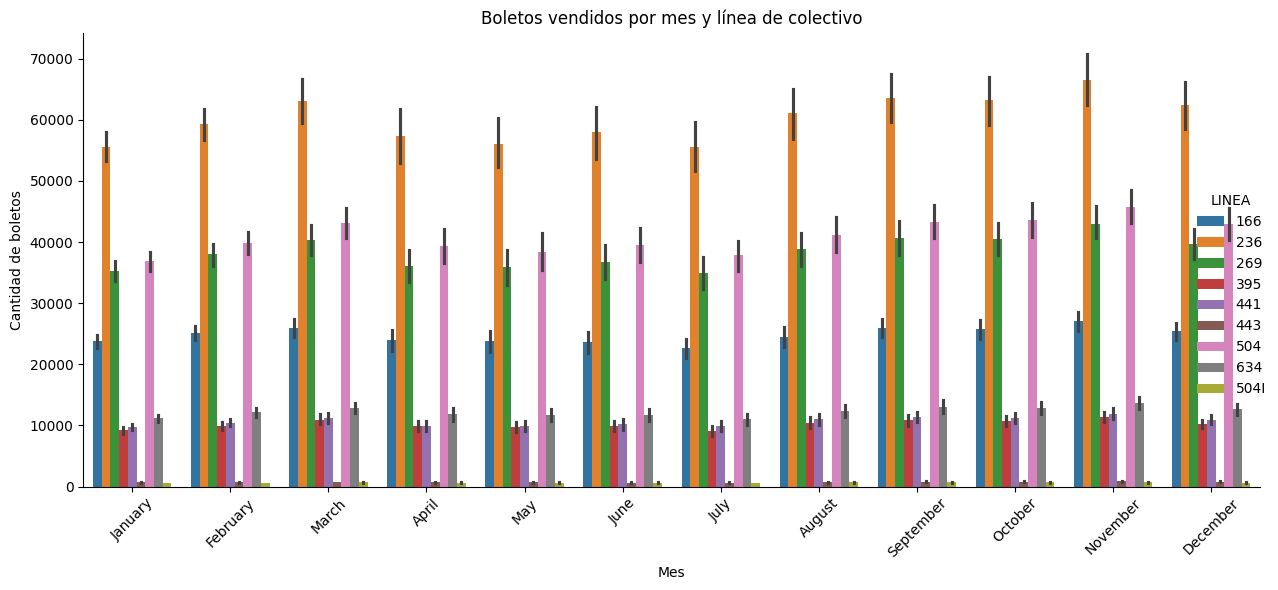

In [315]:

sns.catplot(
    data=df,
    kind="bar",
    x="nombre_mes",
    y='CANT. TRX',
    hue='LINEA',
    height=6,
    aspect=2
)

plt.title("Boletos vendidos por mes y línea de colectivo")
plt.xlabel("Mes")
plt.ylabel("Cantidad de boletos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_72193/1030630302.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(['nombre_mes', 'nombre_dia'])['CANT. TRX'].sum().unstack()


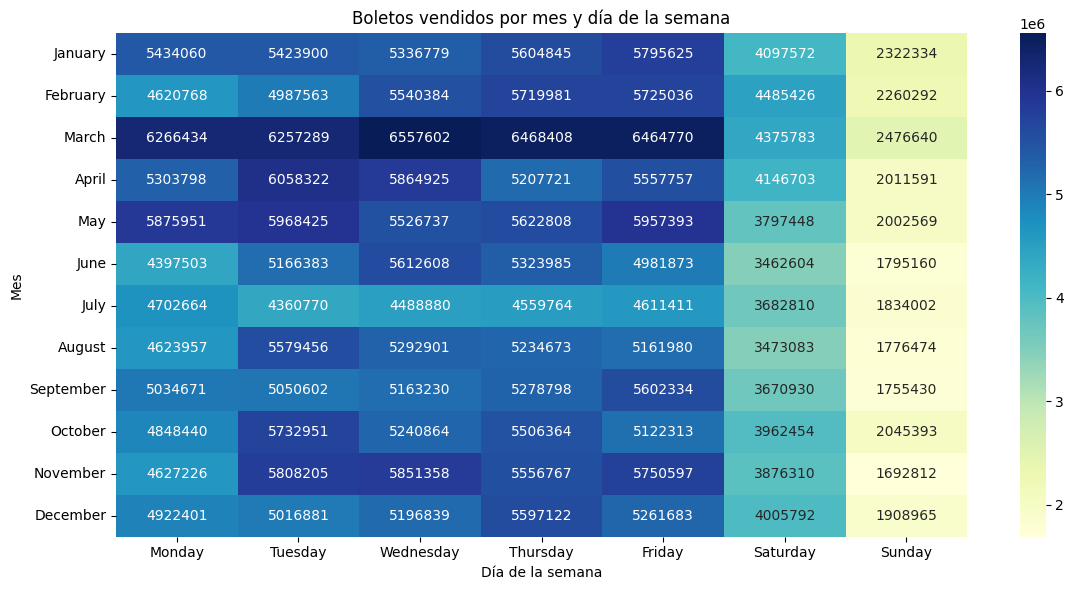

In [316]:
tabla = df.groupby(['nombre_mes', 'nombre_dia'])['CANT. TRX'].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(tabla, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Boletos vendidos por mes y día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Mes')
plt.tight_layout()
plt.show()

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_72193/1233145774.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(['nombre_mes', 'nombre_dia'])['KM'].sum().unstack()


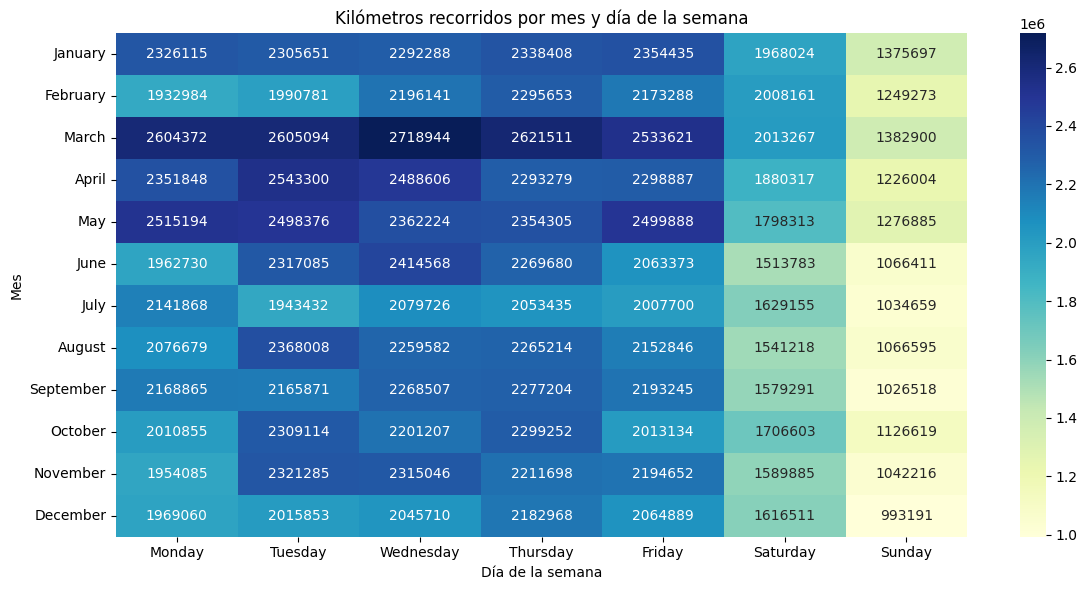

In [317]:
tabla = df.groupby(['nombre_mes', 'nombre_dia'])['KM'].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(tabla, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Kilómetros recorridos por mes y día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Mes')
plt.tight_layout()
plt.show()

## **Análisis y transformación de features**

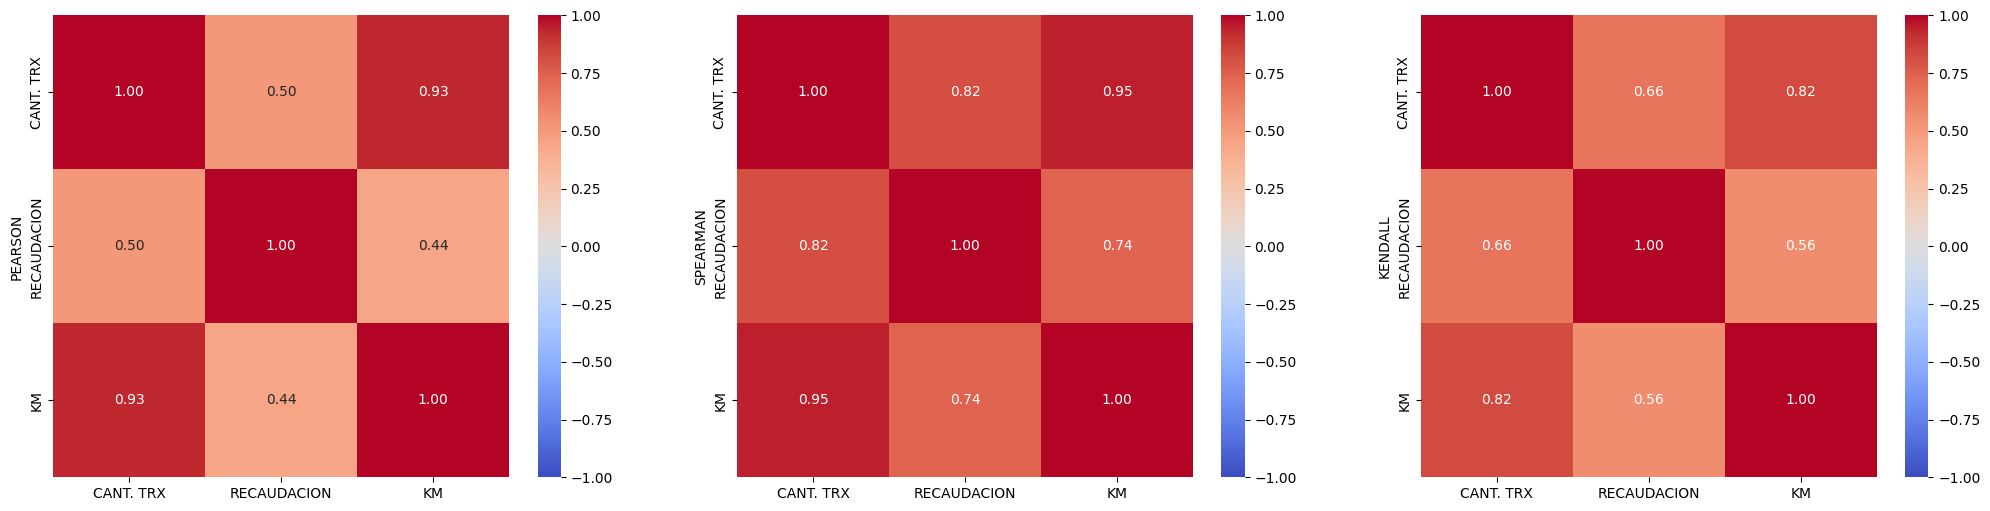

In [318]:
plt.figure(figsize=(25,6))

plt.subplot(1, 3, 1)
sns.heatmap(
    df.corr(numeric_only=True), 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm",  
    center=0, 
    vmin=-1, 
    vmax=1)
plt.ylabel('PEARSON')

plt.subplot(1, 3, 2)
sns.heatmap(
    df.corr(method='spearman', numeric_only=True),
    annot=True, 
    fmt=".2f",  
    cmap="coolwarm",  
    center=0, 
    vmin=-1, 
    vmax=1,)
plt.ylabel('SPEARMAN')

plt.subplot(1, 3, 3)
sns.heatmap(
    df.corr(method='kendall', numeric_only=True), 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm",
    center=0, 
    vmin=-1, 
    vmax=1,)
plt.ylabel('KENDALL')

plt.show()

In [319]:
# Ordenar por fecha por las dudas
df = df.sort_values('FECHA')

# Obtener fecha de corte (80%)
fecha_corte = df['FECHA'].quantile(0.8)

# Dividir el DataFrame
df_train = df[df['FECHA'] <= fecha_corte]  # 80%
df_test = df[df['FECHA'] > fecha_corte]   # 20%

In [320]:
X_train = df_train.drop(columns=['nombre_dia', 'nombre_mes', 'CANT. TRX', 'KM', 'RECAUDACION'])  # Eliminar columnas no predictoras
y_train = df_train['CANT. TRX']

X_test = df_test.drop(columns=['nombre_dia', 'nombre_mes', 'CANT. TRX', 'KM', 'RECAUDACION'])  # Eliminar columnas no predictoras
y_test = df_test['CANT. TRX']